In [32]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="3"></a>
**Implementing RNN with KERAS**

<a id="4"></a>
**Importing and Preprocessind Data**

<a id="5"></a>
**Loading Data:**

In [34]:
dataset_train = pd.read_csv('/content/drive/MyDrive/rnn/Google_Stock_Price_Train.csv')

In [35]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [36]:
#open'ı kullanıcaz sadece:
train = dataset_train.loc[:, ['Open']].values #array'e çevirdik
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

<a id="6"></a>
**Feature Scaling:**

In [37]:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

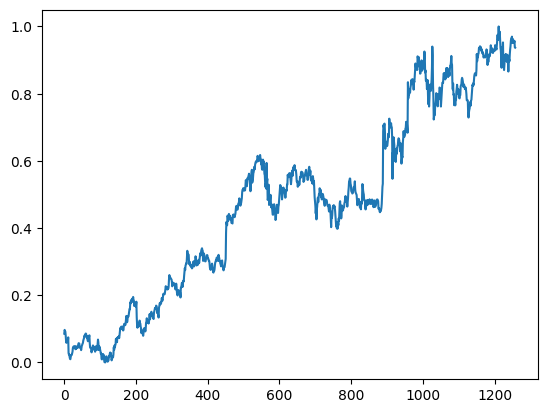

In [38]:
plt.plot(train_scaled)

In [43]:
train_scaled.shape

(1258, 1)

<a id="7"></a>
**Create Data Structure:**

In [48]:

X_train = []
y_train = []
timesteps = 70

for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [49]:
print(X_train.shape)

(1180, 70)


<a id="8"></a>
**Reshape:**

In [50]:
#Reshaping:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
print(X_train.shape)

(1180, 70, 1)


In [52]:
print(X_train.shape[1],1)

70 1


<a id="9"></a>
**Create RNN Model**

In [12]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 8s 92ms/step - loss: 0.3313
Epoch 2/100
38/38 [==============================] - 3s 75ms/step - loss: 0.1933
Epoch 3/100
38/38 [==============================] - 4s 98ms/step - loss: 0.1760
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.1116
Epoch 5/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0809
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0689
Epoch 7/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0625
Epoch 8/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0501
Epoch 9/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0436
Epoch 10/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0376
Epoch 11/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0345
Epoch 12/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0284
Epoch 13/100
38/38 [===

* Epochs artırılbilir
* Batch size değiştirilebilir
* Activation functionlar değiştirilebilir
* Layer sayısı artırılabilir

<a id="10"></a>
**Prediction and Visualization of RNN Model**

In [13]:
dataset_test = pd.read_csv('/content/drive/MyDrive/rnn/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [14]:
real_stock_price = dataset_test.loc[:, ['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [15]:
#Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [16]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
#inverse_transform ile, scale edildikten sonra predict edilen değerleri gerçek değer aralığına çekiyoruz

1/1 [==============================] - 1s 516ms/step


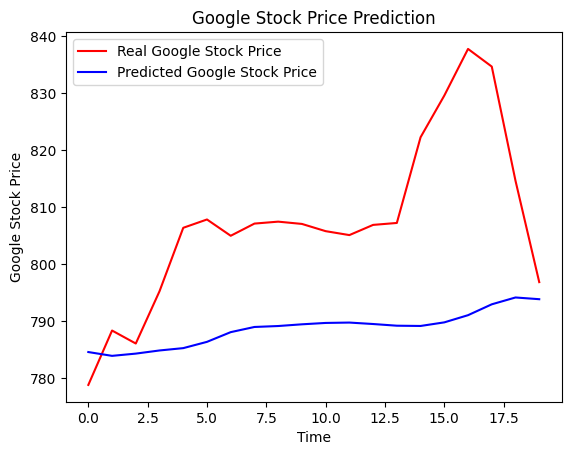

In [17]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<a id="12"></a>
**Implementing LSTM with KERAS**

<a id="13"></a>
**Loading Data**

In [18]:
data = pd.read_csv('/content/drive/MyDrive/lstm/international-airline-passengers.csv')
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


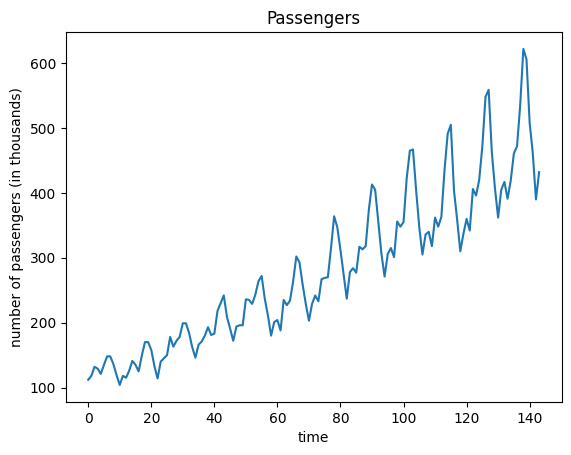

In [19]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()

<a id="14"></a>
**Preprocessing Data**

<a id="15"></a>
**Reshape:**

In [20]:
dataset = dataset.reshape(-1,1) #(145, ) iken (145,1)e çevirdik
dataset = dataset.astype('float32')
dataset.shape

(145, 1)

<a id="16"></a>
**Scaling:**

In [21]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

<a id="17"></a>
**Train Test Split:**

In [22]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

train size: 72, test size: 73


In [23]:
dataX = []
datay = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(train[i + timestemp, 0])

    
trainX, trainy = np.array(dataX), np.array(datay)

In [24]:
dataX = []
datay = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(test[i + timestemp, 0])

    
testX, testy = np.array(dataX), np.array(datay)

In [25]:
trainX.shape

(61, 10)

In [26]:
trainX = np.reshape(trainX, (trainX.shape[0],1,  trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,  testX.shape[1]))

In [27]:
trainX.shape

(61, 1, 10)

<a id="18"></a>
**Create LSTM Model**

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [29]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainy, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 2s 2ms/step - loss: 0.0456
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 5/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 10/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 11/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 12/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 13/50
61/61 [==============================

<a id="19"></a>
**Prediction**

In [30]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 8ms/step
Train Score: 18.31 RMSE
Test Score: 41.98 RMSE


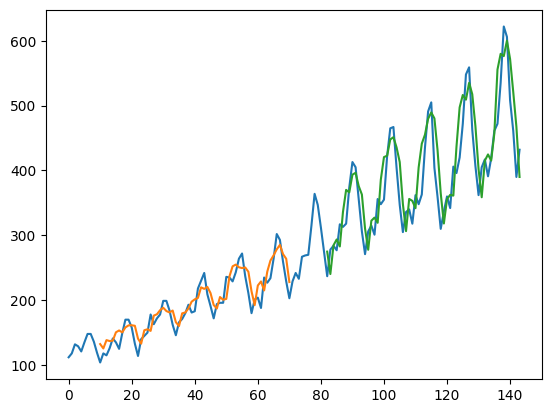

In [31]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()